In [2]:
import numpy as np

In [3]:
np.random.binomial(6,0.5,10)

array([3, 4, 5, 5, 2, 4, 3, 4, 3, 3])

In [4]:
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# data: W L W W W L W L W
# if p = 0.5, what are the odds that for n = 9 throws, w = 6?
binom.pmf(6,9,0.5)

0.16406250000000006

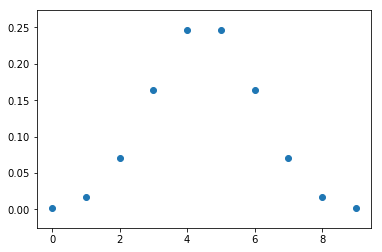

In [6]:
# what if we let w vary between 1 and 9?
a=np.arange(10)
plt.scatter(a,binom.pmf(a,9,0.5))

In [7]:
steps=20
pvals=np.linspace(0,1,steps)
print(pvals)

[ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
  0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
  0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
  0.94736842  1.        ]


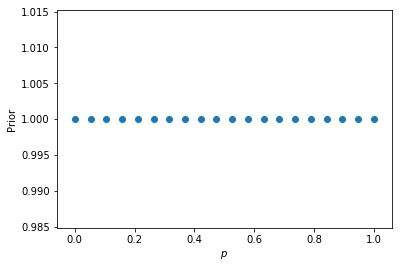

In [8]:
prior=np.ones(len(pvals))
plt.scatter(pvals,prior)
plt.xlabel('$p$')
plt.ylabel('Prior')

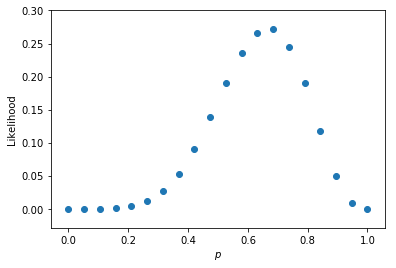

In [9]:
likelihood=binom.pmf(6,9,pvals)
plt.scatter(pvals,likelihood)
plt.xlabel('$p$')
plt.ylabel('Likelihood')

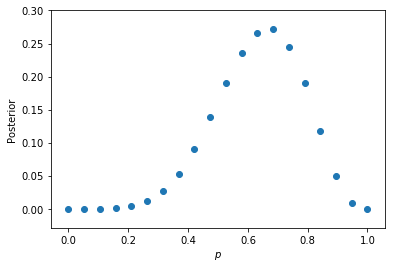

In [10]:
posterior=prior*likelihood
plt.scatter(pvals,posterior)
plt.xlabel('$p$')
plt.ylabel('Posterior')

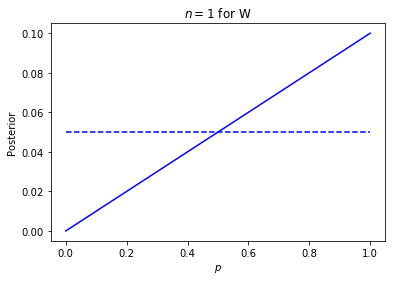

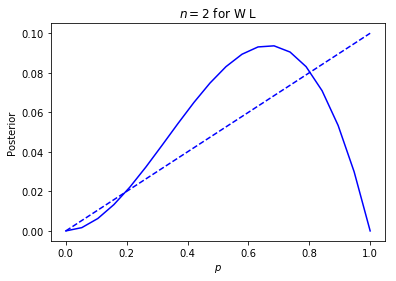

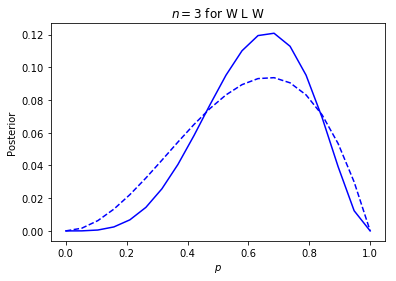

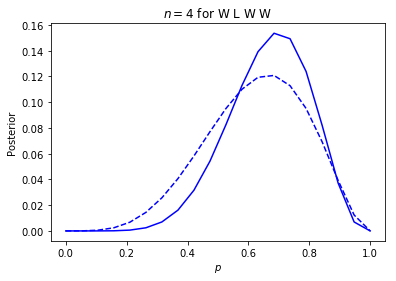

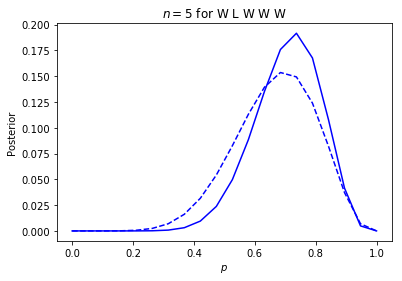

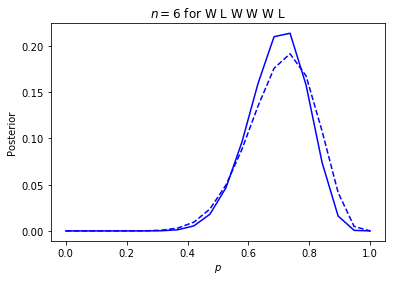

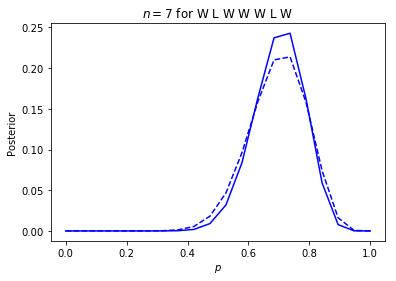

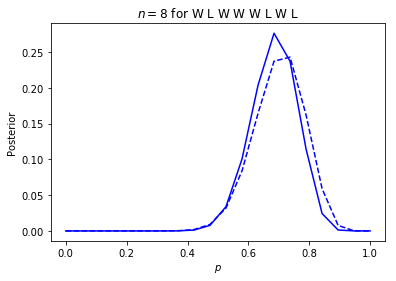

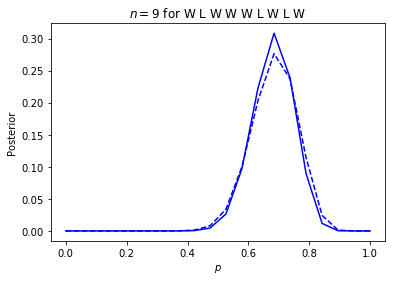

In [11]:
data='W L W W W L W L W'
c_obs=[1,1,2,3,4,4,5,5,6]
prior=np.ones(len(pvals))
for w,n in zip(c_obs,range(1,len(c_obs)+1)):
    prior=prior
    likelihood=binom.pmf(w,n,pvals)
    posterior=prior*likelihood
    plt.plot(pvals,posterior/posterior.sum(),'b')
    plt.plot(pvals,prior/prior.sum(),'b--')
    plt.xlabel('$p$')
    plt.ylabel('Posterior')
    plt.title('$n=%i$ for %s'%(n,data[:2*n]))
    plt.show()
    prior=posterior

In [12]:
# MLE
from scipy.optimize import minimize

In [13]:
likef= lambda x : -binom.pmf(6,9,x)

In [14]:
op=minimize(likef,[0.5])
op.message

'Desired error not necessarily achieved due to precision loss.'

In [15]:
op=minimize(likef,[0.1])
op.message

'Optimization terminated successfully.'

In [16]:
op.x # w/n

array([ 0.66666666])

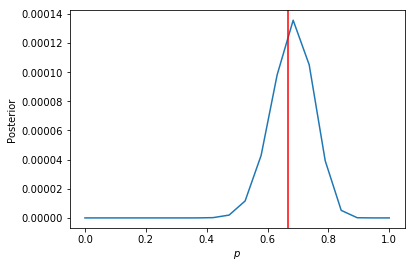

In [17]:
plt.plot(pvals,posterior)
plt.axvline(op.x,c='r')
plt.xlabel('$p$')
plt.ylabel('Posterior')

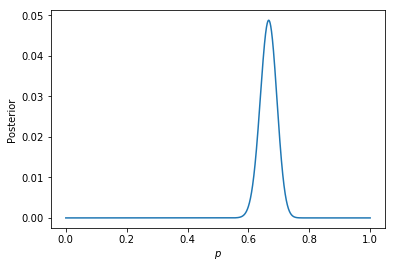

In [18]:
# what if we got 200 w out of 300 throws?
steps=2000
pvals=np.linspace(0,1,steps)
prior=np.ones(len(pvals))
likelihood=binom.pmf(200,300,pvals)
posterior=prior*likelihood
plt.plot(pvals,posterior)
plt.xlabel('$p$')
plt.ylabel('Posterior')

In [23]:
c_sum=posterior.sum()
dsum=0
done1=False
done2=False
for i in range(steps):
    dsum+=posterior[i]
    if dsum >= c_sum*.16 and not(done1):
        i16=i
        done1=True
    if dsum >= c_sum/2 and not(done2):
        i50=i
        done2=True
    if dsum >= c_sum*.84:
        i84=i
        break
median=pvals[i50]



In [24]:
print('Median = ',median)
print('MLE estimation = ',pvals[np.argmax(posterior)])

Median =  0.665832916458
MLE estimation =  0.666833416708


In [25]:
dn=median-pvals[i16]
dx=pvals[i84]-median

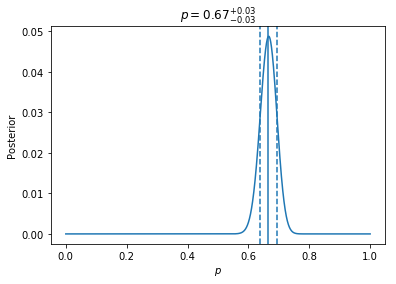

In [26]:
plt.plot(pvals,posterior)
plt.axvline(pvals[i16],linestyle='--')
plt.axvline(median)
plt.axvline(pvals[i84],linestyle='--')
plt.title('$p=%.2f_{-%.2f}^{+%.2f}$'%(median,dn,dx))
plt.xlabel('$p$')
plt.ylabel('Posterior')